In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1

In [104]:
# read in data
sp = pd.read_csv('SP.csv',names=['Date', 'Price'])
sptr = pd.read_csv('SPTR.csv',names=['Date', 'Price'])
sptr_r = pd.read_csv('SPTR_ret.csv',names=['Date', 'Value'])
ba = pd.read_csv('BA.csv',names=['Date', 'Price'])
vix = pd.read_csv('VIX.csv',names=['Date', 'Price'])
vix_r = pd.read_csv('VIX_r.csv',names=['Date', 'Value'])
ba_beta = pd.read_csv('BA_beta.csv',names=['Date', 'Price'])
ba_r = pd.read_csv('BA_return.csv',names=['Date', 'Value'])

###1(a)

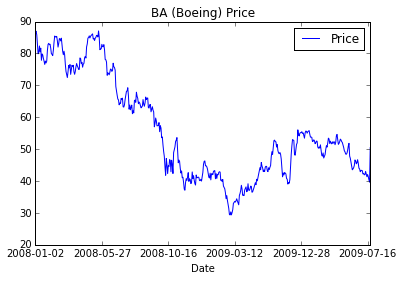

In [29]:
ba.plot(x='Date', y='Price', title='BA (Boeing) Price')
plt.savefig('1aBA.png', format='png')

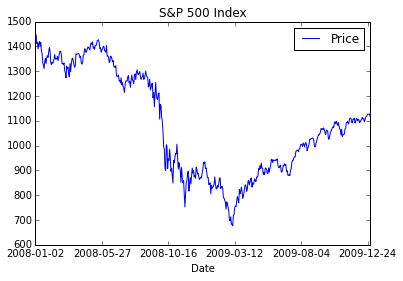

In [27]:
sp.plot(x='Date', y='Price', title='S&P 500 Index')
plt.savefig('1aSP.png', format='png')

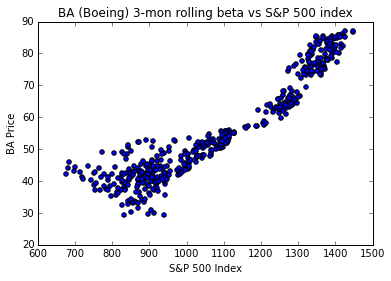

In [109]:
plt.scatter(sp.Price, ba_beta.Price)
plt.title('BA (Boeing) 3-mon rolling beta vs S&P 500 index')
plt.xlabel('S&P 500 Index')
plt.ylabel('BA Price')
plt.savefig('1aBASPscatter.png', format='png')

### 1(b)

In [58]:
import sklearn.linear_model as lm

In [95]:
clf = lm.LinearRegression()
testX = [[i] for i in sptr_r.Value.values]
testY = [[i] for i in ba_r.Value.values]
clf.fit(testX, testY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[-0.00041234] [[ 0.92471118]]
[[ 0.92509641]]


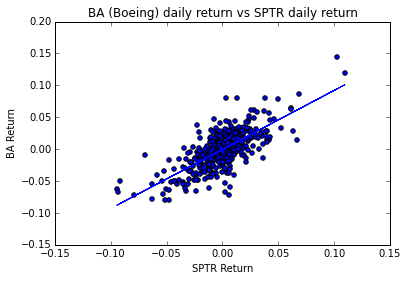

In [96]:
plt.scatter(sptr_r.Value, ba_r.Value)
plt.plot(testX, clf.predict(testX))
plt.title('BA (Boeing) daily return vs SPTR daily return')
plt.xlabel('SPTR Return')
plt.ylabel('BA Return')
plt.savefig('1bBARetSPTRscatter.png', format='png')
print clf.intercept_, clf.coef_
clf2 = lm.LinearRegression(fit_intercept=False)
clf2.fit(testX, testY)
print clf2.coef_

### 1(c)

[-0.00084599] [[-0.23941314]]
[[-0.23939968]]


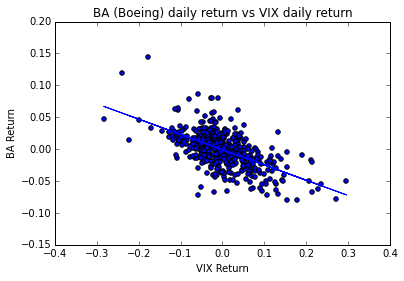

In [108]:
clf3 = lm.LinearRegression()
testX2 = [[i] for i in vix_r.Value.values]
testY = [[i] for i in ba_r.Value.values]
clf3.fit(testX2, testY)
print clf3.intercept_, clf3.coef_
clf4 = lm.LinearRegression(fit_intercept=False)
clf4.fit(testX2, testY)
print clf4.coef_

plt.scatter(vix_r.Value, ba_r.Value)
plt.plot(testX2, clf3.predict(testX2))
plt.title('BA (Boeing) daily return vs VIX daily return')
plt.xlabel('VIX Return')
plt.ylabel('BA Return')
plt.savefig('1cBARetVIXscatter.png', format='png')

## Problem 3

### 3(a)

In [110]:
strat = pd.read_excel('3a_data.xlsx')

In [113]:
strat = strat.fillna(0)[:1260]

In [116]:
total = strat.iloc[1259]
strat = strat[:1259]

In [119]:
strat.head()

,TradeDate,NA,Energy,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Information Technology,Telecommunication Services,Utilities,Grand Total,Row Number,Filter
0,01/03/2005,-0.072917,-0.010417,0.093750,0.041667,0.020833,0.000000,-0.031250,-0.020833,-0.020833,0.000000,0.000000,1.110223e-16,1,1
1,01/04/2005,-0.041667,-0.010417,-0.010417,0.052083,-0.031250,-0.020833,-0.010417,-0.020833,0.083333,0.000000,0.000000,-1.041667e-02,3,1
2,01/05/2005,0.000000,0.010417,0.020833,0.020833,0.062500,-0.041667,-0.041667,-0.020833,-0.010417,0.000000,0.000000,0.000000e+00,5,1
3,01/06/2005,-0.104167,0.000000,0.010417,0.041667,-0.020833,-0.020833,-0.041667,-0.031250,0.166667,0.000000,0.000000,0.000000e+00,7,1
4,01/07/2005,0.041667,-0.010417,0.010417,-0.020833,0.010417,-0.010417,-0.031250,-0.072917,0.093750,-0.010417,-0.010417,-1.041667e-02,9,1


In [120]:
max(strat.NA)

0.30985915492399985

###3(d)

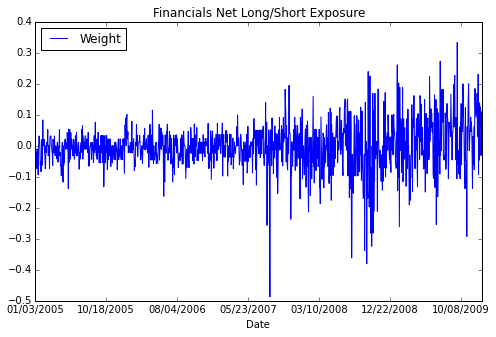

In [173]:
substrat = strat[['TradeDate', 'Financials']]
substrat.columns = ['Date', 'Weight']
substrat.plot(x='Date', y='Weight', title='Financials Net Long/Short Exposure')
plt.gcf().set_size_inches(8,5)
plt.savefig('3d.png', format='png')

In [165]:
mask = substrat.Weight.values>=0
substrat_abs_pos = pd.DataFrame({'Date': substrat.Date[mask], 'Long_Weight': substrat.Weight.values[mask]})
substrat_abs_neg = pd.DataFrame({'Date': substrat.Date[~mask], 'Short_Weight': abs(substrat.Weight.values[~mask])})

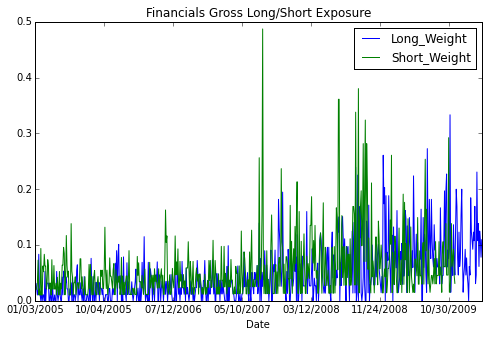

In [172]:
fg = plt.figure()
fg = substrat_abs_pos.plot(x='Date', y='Long_Weight', title='Financials Gross Long/Short Exposure')
substrat_abs_neg.plot(x='Date', y='Short_Weight', ax=fg)
plt.gcf().set_size_inches(8,5)
plt.savefig('3d_2.png', format='png')

## Problem 4

In [188]:
index = pd.read_excel('4_index.xlsx')
index_mem = pd.read_excel('4_indexmember.xlsx')

In [177]:
index_mem.tail()

,d,id,weight,vol_021,vol_063
15111,2009-12-31,65875,0.024010,0.115423,0.153015
15112,2009-12-31,66093,0.020314,0.131045,0.155402
15113,2009-12-31,66181,0.020966,0.160129,0.224196
15114,2009-12-31,76076,0.017350,0.130623,0.196211
15115,2009-12-31,89006,0.019698,0.099537,0.147980


In [178]:
index.tail()

,d,var_021,var_063
499,2009-12-24,0.012472,0.022532
500,2009-12-28,0.012454,0.022003
501,2009-12-29,0.009417,0.021863
502,2009-12-30,0.009350,0.021789
503,2009-12-31,0.009370,0.020408


In [190]:
index_mem['w_sig1'] = index_mem.vol_021.values*index_mem.weight.values
index_mem['w_sig3'] = index_mem.vol_063.values*index_mem.weight.values
index_mem['w_var1'] = index_mem.w_sig1.values**2
index_mem['w_var3'] = index_mem.w_sig3.values**2


In [215]:
index_mem.tail()

,d,id,weight,vol_021,vol_063,w_sig1,w_sig3,w_var1,w_var3
15111,2009-12-31,65875,0.024010,0.115423,0.153015,0.002771,0.003674,0.000008,0.000013
15112,2009-12-31,66093,0.020314,0.131045,0.155402,0.002662,0.003157,0.000007,0.000010
15113,2009-12-31,66181,0.020966,0.160129,0.224196,0.003357,0.004701,0.000011,0.000022
15114,2009-12-31,76076,0.017350,0.130623,0.196211,0.002266,0.003404,0.000005,0.000012
15115,2009-12-31,89006,0.019698,0.099537,0.147980,0.001961,0.002915,0.000004,0.000008


In [194]:
# initialize result storage dataframe.
resultdf = pd.DataFrame({'d': index.d.values, 'realized_var_1': index.var_021, 'realized_var_3': index.var_063})

In [206]:
rows = resultdf.shape[0]
var1_0 = np.zeros([rows,1])
var3_0 = np.zeros([rows,1])
var1_1 = np.zeros([rows,1])
var3_1 = np.zeros([rows,1])
rho_1 = np.zeros([rows,1])
rho_3 = np.zeros([rows,1])

for row in xrange(rows):
    date = resultdf.iloc[row].d
    daily_stocks = index_mem[index_mem.d.values==date]
    var1_0[row] = sum(daily_stocks.w_var1) #index variance 0 - 1 month
    var3_0[row] = sum(daily_stocks.w_var3) #index variance 0 - 3 months
    var1_1[row] = sum(daily_stocks.w_sig1)**2
    var3_1[row] = sum(daily_stocks.w_sig3)**2
    rho_1[row] = (index.var_021.iloc[row]-var1_0[row])/(var1_1[row]-var1_0[row])
    rho_3[row] = (index.var_063.iloc[row]-var3_0[row])/(var3_1[row]-var3_0[row])

resultdf['var1_0'] = var1_0
resultdf['var3_0'] = var3_0
resultdf['var1_1'] = var1_1
resultdf['var3_1'] = var3_1
resultdf['rho_1'] = rho_1
resultdf['rho_3'] = rho_3


In [214]:
resultdf.tail()

,d,realized_var_1,realized_var_3,var1_0,var3_0,var1_1,var3_1,rho_1,rho_3
499,2009-12-24,0.012472,0.022532,0.001154,0.001861,0.028511,0.045075,0.413732,0.478340
500,2009-12-28,0.012454,0.022003,0.001155,0.001825,0.028364,0.044044,0.415267,0.477945
501,2009-12-29,0.009417,0.021863,0.001031,0.001806,0.025514,0.043669,0.342545,0.479118
502,2009-12-30,0.009350,0.021789,0.001012,0.001803,0.025052,0.043559,0.346854,0.478638
503,2009-12-31,0.009370,0.020408,0.001013,0.001740,0.024702,0.042102,0.352762,0.462519


In [217]:
resultdf.realized_var_1.dtype

dtype('float64')

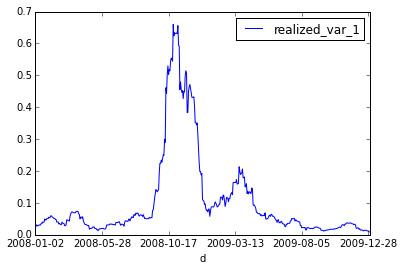

In [218]:
resultdf.plot(x = 'd', y='realized_var_1')

In [233]:
?resultdf.plot()

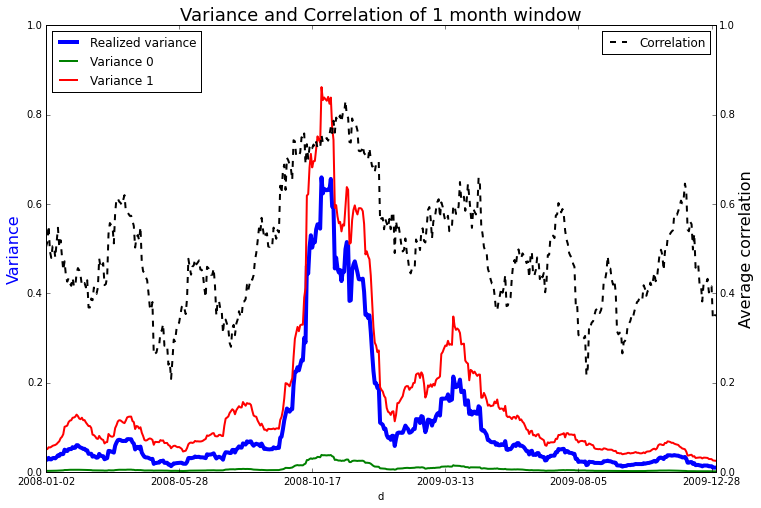

In [265]:
ax1 = resultdf.plot('d', 'realized_var_1', label='Realized variance', color='b', lw=4)
resultdf.plot('d', 'var1_0', label='Variance 0', color='g',lw=2, ax=ax1)
resultdf.plot('d', 'var1_1', label='Variance 1', color='r',lw=2, ax=ax1)
ax1.set_ylabel('Variance', color='b', fontsize=16)
ax1.legend(loc=2)
ax1.set_ylim(0,1)
ax1.set_title('Variance and Correlation of 1 month window', fontsize=18)

ax2 = ax1.twinx()
resultdf.plot(x='d', y='rho_1',ax=ax2,color='k', ls='--', lw=2, label='Correlation')
ax2.set_ylabel('Average correlation', color='k', fontsize=16)
ax2.set_ylim(0,1)
plt.gcf().set_size_inches(12, 8)
plt.xlabel('Date')
plt.savefig('4_1.png', format='png')
plt.show()

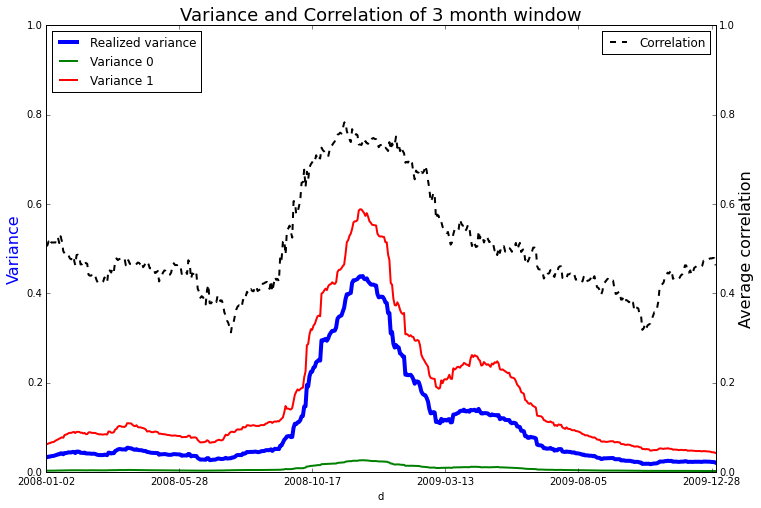

In [264]:
ax1 = resultdf.plot('d', 'realized_var_3', label='Realized variance', color='b', lw=4)
resultdf.plot('d', 'var3_0', label='Variance 0', color='g',lw=2, ax=ax1)
resultdf.plot('d', 'var3_1', label='Variance 1', color='r',lw=2, ax=ax1)
ax1.set_ylabel('Variance', color='b', fontsize=16)
ax1.set_ylim(0,1)
ax1.legend(loc=2)
ax1.set_title('Variance and Correlation of 3 month window', fontsize=18)

ax2 = ax1.twinx()
resultdf.plot(x='d', y='rho_3',ax=ax2,color='k', lw=2,ls='--', label='Correlation')
ax2.set_ylabel('Average correlation', color='k', fontsize=16)
ax2.set_ylim(0,1)
plt.gcf().set_size_inches(12, 8)
plt.xlabel('Date')
plt.savefig('4_2.png', format='png')
plt.show()

In [269]:
resultdf.iloc[resultdf['rho_1'].idxmax()]

d                 2008-11-21
realized_var_1     0.4987708
realized_var_3     0.3863472
var1_0            0.02655983
var3_0            0.02248315
var1_1             0.5947371
var3_1             0.4865919
rho_1              0.8310979
rho_3              0.7840061
Name: 225, dtype: object

In [268]:
resultdf.iloc[resultdf['rho_3'].idxmax()]

d                 2008-11-21
realized_var_1     0.4987708
realized_var_3     0.3863472
var1_0            0.02655983
var3_0            0.02248315
var1_1             0.5947371
var3_1             0.4865919
rho_1              0.8310979
rho_3              0.7840061
Name: 225, dtype: object